In [13]:
#Montando um dataset para análise de dados para  a área de finanças

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def carregar_dados(arquivo):
    """Carrega o arquivo e exibe as primeiras linhas. Tenta ler como Excel ou CSV."""
    try:
        # Tenta carregar o arquivo como Excel
        df = pd.read_excel(arquivo)
        print("Dados carregados com sucesso como arquivo Excel!\n")
        print(df.head())
        return df
    except Exception as e:
        print(f"Erro ao carregar arquivo como Excel: {e}")
        try:
            # Caso o arquivo seja CSV, tenta ler com diferentes codificações
            df = pd.read_csv(arquivo, encoding='ISO-8859-1')
            print("Dados carregados com sucesso como arquivo CSV com codificação 'ISO-8859-1'!\n")
            print(df.head())
            return df
        except Exception as e:
            print(f"Erro ao tentar carregar como CSV: {e}")
            return None

def estatisticas_basicas(df):
    """Exibe estatísticas básicas dos dados numéricos."""
    print("\nResumo Estatístico:")
    print(df.describe())

def limpar_dados(df):
    """Remove valores nulos e trata valores inconsistentes."""
    df = df.dropna()  # Remove nulos
    df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinitos

    # Converter colunas para numérico manualmente
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass  # Mantém colunas não numéricas inalteradas

    print("\nDados limpos!\n")
    return df

def reduzir_dimensionalidade(df):
    """Reduz a dimensionalidade dos dados usando PCA."""
    num_cols = df.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas
    if not num_cols.empty:
        scaler = StandardScaler()
        num_cols_scaled = scaler.fit_transform(num_cols)  # Normaliza os dados
        pca = PCA(n_components=min(num_cols.shape[1], 2))  # Reduz para 2 componentes
        df_reduzido = pca.fit_transform(num_cols_scaled)
        print("\nRedução de Dimensionalidade realizada com PCA!")

        # Verifica se o PCA gerou mais de uma componente
        if df_reduzido.shape[1] > 1:
            df_reduzido = pd.DataFrame(df_reduzido, columns=["PC1", "PC2"])
            return df_reduzido
        else:
            print("O PCA gerou apenas uma componente. Não será possível plotar as densidades.")
            return None
    else:
        print("Não há dados numéricos suficientes para PCA.")
        return None

def gerar_graficos(df):
    """Gera gráficos financeiros básicos."""
    num_cols = df.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas

    if not num_cols.empty:
        plt.figure(figsize=(10, 5))
        sns.histplot(num_cols, bins=20, kde=True)  # Removido warn_singular
        plt.title("Distribuição de Valores Financeiros")
        plt.show()

    # Aplicar PCA para reduzir a dimensionalidade antes de tentar o KDE
    df_reduzido = reduzir_dimensionalidade(df)

    if df_reduzido is not None and df_reduzido.shape[1] > 1:  # Verifica se a redução foi bem-sucedida
        plt.figure(figsize=(10, 5))
        sns.kdeplot(df_reduzido['PC1'], df_reduzido['PC2'], fill=True)
        plt.title("Estimativa de Densidade com PCA (KDE)")
        plt.show()

    if 'Data' in df.columns:
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
        df = df.dropna(subset=['Data'])  # Remove valores NaT
        if not df.empty:
            df.set_index('Data', inplace=True)
            df.sort_index(inplace=True)
            df.plot(figsize=(12,6), title="Evolução dos Dados Financeiros")
            plt.show()

def exportar_dados(df, formato='excel'):
    """Exporta os dados para Excel ou JSON."""
    try:
        if formato == 'excel':
            df.to_excel('dados_financeiros_processados.xlsx', index=False)
            print("Dados exportados para Excel.")
        elif formato == 'json':
            df.to_json('dados_financeiros_processados.json', orient='records')
            print("Dados exportados para JSON.")
        else:
            print("Formato não suportado.")
    except Exception as e:
        print(f"Erro ao exportar dados: {e}")

# Execução do Programa
if __name__ == "__main__":
    arquivo = '/content/DadosFinanceiros.xlsx'  # Atualize com o caminho correto do seu arquivo
    df = carregar_dados(arquivo)
    if df is not None:
        estatisticas_basicas(df)
        df = limpar_dados(df)
        gerar_graficos(df)
        exportar_dados(df, formato='excel')






Dados carregados com sucesso como arquivo Excel!

       Tipo     Componente 01/01/2019 01/02/2019 01/03/2019 01/04/2019  \
0  Receitas         Vendas   30000,00   32456,90   33128,34   33560,00   
1  Receitas       Aluguéis    1000,00    1234,00    1267,00    1267,00   
2  Receitas  Licenciamento    5000,00    5000,00    5000,00    5000,00   
3  Receitas      Franquias    2000,00    2000,00    2000,00    2000,00   
4  Receitas  Investimentos    2000,00    2000,00    2000,00    2000,00   

  01/05/2019 01/06/2019 01/07/2019 01/08/2019  ... 01/03/2022 01/04/2022  \
0   33890,76   34200,00   34300,00   34500,00  ...   43000,00   43000,00   
1    1267,00    1300,00    1340,00    1500,00  ...    4000,00    4000,00   
2    5000,00    5000,00    5000,00    5000,00  ...    7000,00    7000,00   
3    2000,00    2000,00    2000,00    2100,00  ...    1400,00    1400,00   
4    2000,00    2000,00    2000,00    2000,00  ...    2500,00    2500,00   

  01/05/2022 01/06/2022 01/07/2022 01/08/2022 01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def carregar_dados(arquivo):
    """Carrega o arquivo e exibe as primeiras linhas. Tenta ler como Excel ou CSV."""
    try:
        # Tenta carregar o arquivo como Excel
        df = pd.read_excel(arquivo)
        print("Dados carregados com sucesso como arquivo Excel!\n")
        print(df.head())
        return df
    except Exception as e:
        print(f"Erro ao carregar arquivo como Excel: {e}")
        try:
            # Caso o arquivo seja CSV, tenta ler com diferentes codificações
            df = pd.read_csv(arquivo, encoding='ISO-8859-1')
            print("Dados carregados com sucesso como arquivo CSV com codificação 'ISO-8859-1'!\n")
            print(df.head())
            return df
        except Exception as e:
            print(f"Erro ao tentar carregar como CSV: {e}")
            return None

def estatisticas_basicas(df):
    """Exibe estatísticas básicas dos dados numéricos."""
    print("\nResumo Estatístico:")
    print(df.describe())

def limpar_dados(df):
    """Remove valores nulos e trata valores inconsistentes."""
    df = df.dropna()  # Remove nulos
    df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinitos

    # Converter colunas para numérico manualmente
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            pass  # Mantém colunas não numéricas inalteradas

    print("\nDados limpos!\n")
    return df

def reduzir_dimensionalidade(df):
    """Reduz a dimensionalidade dos dados usando PCA."""
    num_cols = df.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas
    if not num_cols.empty:
        scaler = StandardScaler()
        num_cols_scaled = scaler.fit_transform(num_cols)  # Normaliza os dados

        # Gráfico de comparação: Antes e depois da normalização
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(num_cols, bins=20, kde=True)
        plt.title("Distribuição antes da normalização")

        plt.subplot(1, 2, 2)
        sns.histplot(num_cols_scaled, bins=20, kde=True)
        plt.title("Distribuição após normalização")
        plt.show()

        pca = PCA(n_components=min(num_cols.shape[1], 2))  # Reduz para 2 componentes
        df_reduzido = pca.fit_transform(num_cols_scaled)
        print("\nRedução de Dimensionalidade realizada com PCA!")

        # Verifica se o PCA gerou mais de uma componente
        if df_reduzido.shape[1] > 1:
            df_reduzido = pd.DataFrame(df_reduzido, columns=["PC1", "PC2"])
            return df_reduzido, pca
        else:
            print("O PCA gerou apenas uma componente. Não será possível plotar as densidades.")
            return None, None
    else:
        print("Não há dados numéricos suficientes para PCA.")
        return None, None

def gerar_graficos(df):
    """Gera gráficos financeiros básicos."""
    num_cols = df.select_dtypes(include=['number'])  # Seleciona apenas colunas numéricas

    if not num_cols.empty:
        plt.figure(figsize=(10, 5))
        sns.histplot(num_cols, bins=20, kde=True)  # Removido warn_singular
        plt.title("Distribuição de Valores Financeiros")
        plt.show()

    # Aplicar PCA para reduzir a dimensionalidade antes de tentar o KDE
    df_reduzido, pca = reduzir_dimensionalidade(df)

    if df_reduzido is not None and df_reduzido.shape[1] > 1:  # Verifica se a redução foi bem-sucedida
        # Gráfico comparativo das componentes principais
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.kdeplot(df_reduzido['PC1'], fill=True)
        plt.title("Distribuição do PC1")

        plt.subplot(1, 2, 2)
        sns.kdeplot(df_reduzido['PC2'], fill=True)
        plt.title("Distribuição do PC2")
        plt.show()

        # Visualização da correlação entre as componentes
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_reduzido['PC1'], y=df_reduzido['PC2'])
        plt.title("Distribuição de PC1 vs PC2 após PCA")
        plt.show()

    if 'Data' in df.columns:
        df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
        df = df.dropna(subset=['Data'])  # Remove valores NaT
        if not df.empty:
            df.set_index('Data', inplace=True)
            df.sort_index(inplace=True)
            df.plot(figsize=(12,6), title="Evolução dos Dados Financeiros")
            plt.show()

def exportar_dados(df, formato='excel'):
    """Exporta os dados para Excel ou JSON."""
    try:
        if formato == 'excel':
            df.to_excel('dados_financeiros_processados.xlsx', index=False)
            print("Dados exportados para Excel.")
        elif formato == 'json':
            df.to_json('dados_financeiros_processados.json', orient='records')
            print("Dados exportados para JSON.")
        else:
            print("Formato não suportado.")
    except Exception as e:
        print(f"Erro ao exportar dados: {e}")

# Execução do Programa
if __name__ == "__main__":
    arquivo = '/content/DadosFinanceiros.xlsx'  # Atualize com o caminho correto do seu arquivo
    df = carregar_dados(arquivo)
    if df is not None:
        estatisticas_basicas(df)
        df = limpar_dados(df)
        gerar_graficos(df)
        exportar_dados(df, formato='excel')


Dados carregados com sucesso como arquivo Excel!

       Tipo     Componente 01/01/2019 01/02/2019 01/03/2019 01/04/2019  \
0  Receitas         Vendas   30000,00   32456,90   33128,34   33560,00   
1  Receitas       Aluguéis    1000,00    1234,00    1267,00    1267,00   
2  Receitas  Licenciamento    5000,00    5000,00    5000,00    5000,00   
3  Receitas      Franquias    2000,00    2000,00    2000,00    2000,00   
4  Receitas  Investimentos    2000,00    2000,00    2000,00    2000,00   

  01/05/2019 01/06/2019 01/07/2019 01/08/2019  ... 01/03/2022 01/04/2022  \
0   33890,76   34200,00   34300,00   34500,00  ...   43000,00   43000,00   
1    1267,00    1300,00    1340,00    1500,00  ...    4000,00    4000,00   
2    5000,00    5000,00    5000,00    5000,00  ...    7000,00    7000,00   
3    2000,00    2000,00    2000,00    2100,00  ...    1400,00    1400,00   
4    2000,00    2000,00    2000,00    2000,00  ...    2500,00    2500,00   

  01/05/2022 01/06/2022 01/07/2022 01/08/2022 01

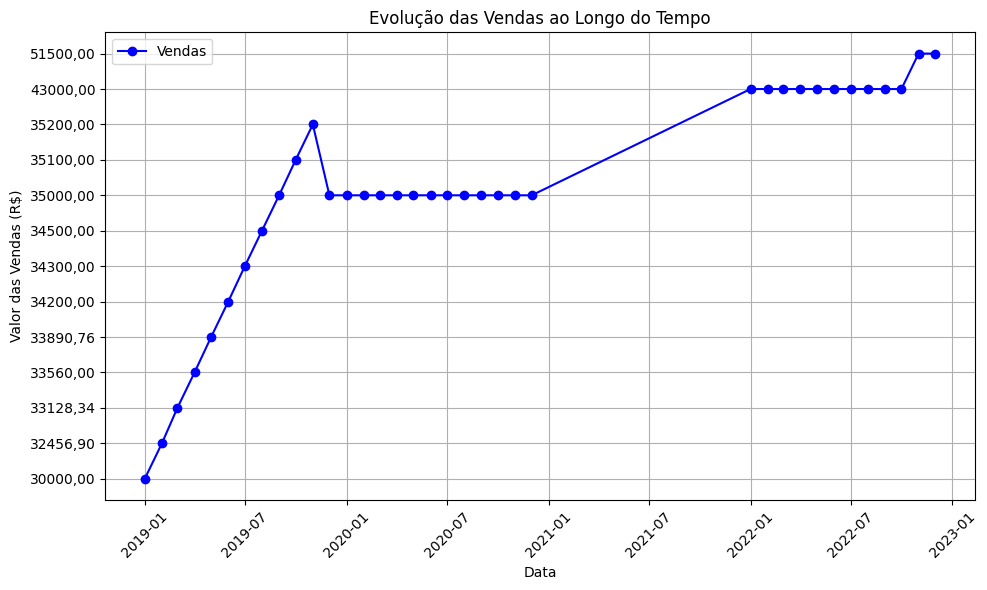

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
file_path = 'caminho_do_arquivo.xlsx'  # Substitua pelo caminho correto
df = pd.read_excel('/content/DadosFinanceiros.xlsx')

# Ajustar o DataFrame para obter os dados de Vendas
vendas = df[df['Componente'] == 'Vendas'].drop(columns=['Tipo', 'Componente']).T
vendas.columns = ['Vendas']
vendas = vendas.reset_index()
vendas.columns = ['Data', 'Vendas']
vendas['Data'] = pd.to_datetime(vendas['Data'], format='%d/%m/%Y')

# Plotando o gráfico de linhas para Vendas ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(vendas['Data'], vendas['Vendas'], marker='o', color='b', label='Vendas')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor das Vendas (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
vendas = df[df['Componente'] == 'Vendas'].drop(columns=['Tipo', 'Componente']).T
vendas.columns = ['Vendas']
vendas = vendas.reset_index()
vendas.columns = ['Data', 'Vendas']
vendas['Data'] = pd.to_datetime(vendas['Data'], format='%d/%m/%Y')



<ipython-input-4-482db69b00ba>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categoria', y='Valores', data=df, palette=['green', 'red', 'blue'])


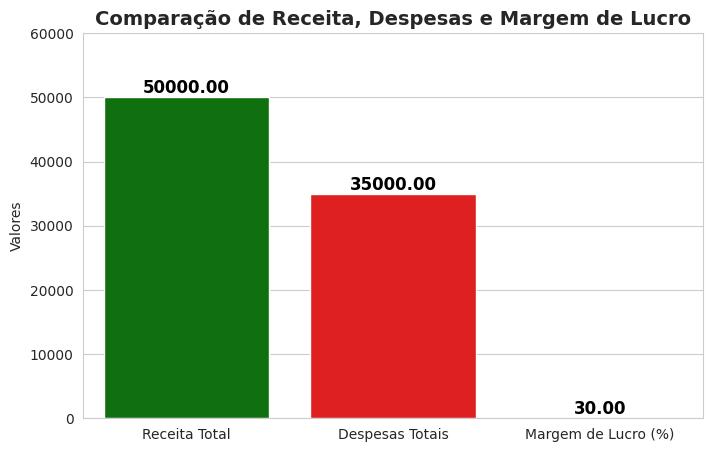

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados fictícios (substitua pelos dados reais do seu código)
dados = {
    'Categoria': ['Receita Total', 'Despesas Totais', 'Margem de Lucro (%)'],
    'Valores': [50000, 35000, (50000 - 35000) / 50000 * 100]
}

df = pd.DataFrame(dados)

# Criando o gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(x='Categoria', y='Valores', data=df, palette=['green', 'red', 'blue'])

# Adicionando rótulos de valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Comparação de Receita, Despesas e Margem de Lucro', fontsize=14, fontweight='bold')
plt.ylabel('Valores')
plt.xlabel('')
plt.ylim(0, max(df['Valores']) * 1.2)
plt.show()

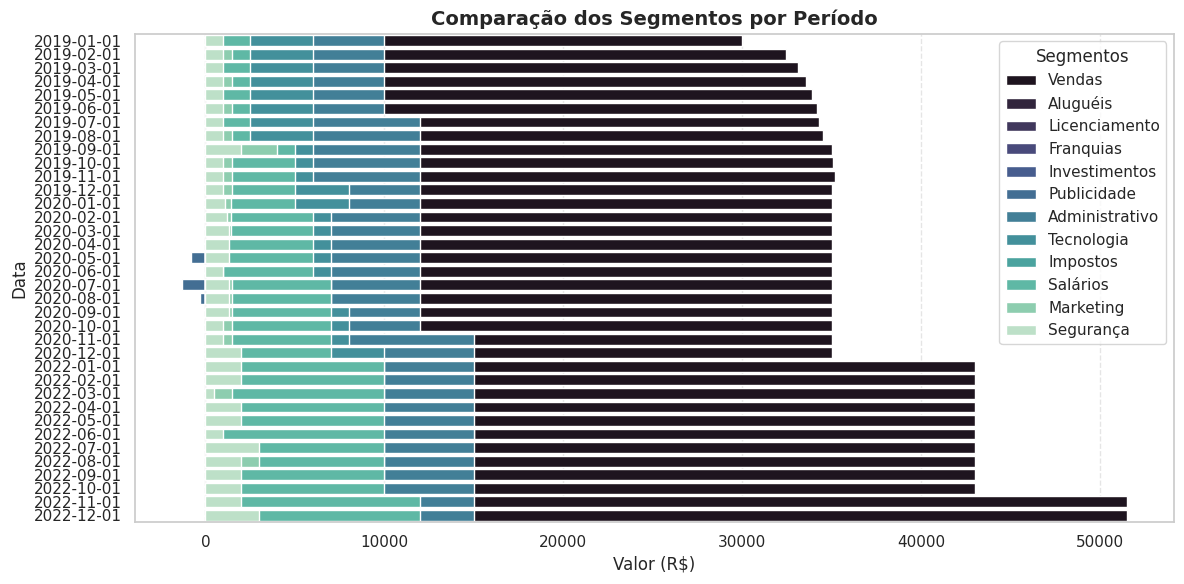

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
file_path = '/content/DadosFinanceiros.xlsx'  # Substitua pelo caminho correto
df = pd.read_excel(file_path)

# Transformar os dados
df_melted = df.melt(id_vars=['Tipo', 'Componente'], var_name='Data', value_name='Valor')
df_melted['Data'] = pd.to_datetime(df_melted['Data'], format='%d/%m/%Y')
df_melted['Valor'] = df_melted['Valor'].astype(str).str.replace(',', '.').astype(float)

# Configuração do Seaborn
sns.set_theme(style="whitegrid")

# Criar gráfico de barras horizontais empilhadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_melted,
    y='Data',
    x='Valor',
    hue='Componente',
    estimator=sum,
    dodge=False,  # Mantém as barras empilhadas
    palette='mako'  # Escolha uma paleta de cores elegante
)

# Personalizar o gráfico
plt.title('Comparação dos Segmentos por Período', fontsize=14, fontweight='bold')
plt.ylabel('Data', fontsize=12)
plt.xlabel('Valor (R$)', fontsize=12)
plt.legend(title="Segmentos", bbox_to_anchor=(1, 1))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Exibir o gráfico
plt.show()






